In [8]:
hello_rules= '''
say_hello = name hello tail
names = name names | name
name = John | mike | 老吴 | 老李
hello = 你好 | 您来了 | 快进来
tail = 啊 | ！
'''

In [9]:
rules = dict()

In [10]:
'add = number + number'

'add = number + number'

In [21]:
stmt_split = '='
or_split = '|' 

for line in hello_rules.split('\n'):
    if not line : continue        
    
    stmt,expr = line.strip().split(stmt_split)
    #print(stmt,expr.split(or_split))
   
    rules[stmt.strip()] = expr.split(or_split)
     
    
rules  

rules["name"]
    

[' John ', ' mike ', ' 老吴 ', ' 老李']

In [32]:
import random
def generate(grammar_rule,target):
    if target in grammar_rule:
        candidates = grammar_rule[target]  # ['name names', 'name']
        candidate = random.choice(candidates) # 'name names', 'name'
        
        return ''.join(generate(grammar_rule,target=c.strip()) for c in candidate.split())
    else:
        return target


In [46]:
generate(rules,target = 'say_hello')

'John你好啊'

In [56]:
simple_grammar = '''
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => Adj | Adj Adj*
verb_phrase => verb noun_phrase
Article => 一个 | 这个
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐着 | 听着 | 看见
Adj => 蓝色的 |好看的 | 小小的
'''

In [57]:
def get_generation_by_gram(grammar_str,target,stmt_split='=',or_split='|'):
    rules = dict()
    for line in grammar_str.split('\n'):
        if not line: continue
        
        stmt,expr = line.split(stmt_split)
        
        rules[stmt.strip()] = expr.split(or_split)
    
    generated = generate(rules,target=target)
    
    return generated

In [60]:
get_generation_by_gram(simple_grammar,target='sentence',stmt_split='=>')

'一个小小的小猫看见一个小小的小猫'

In [72]:
simple_programming ='''
if_stmt => if { cond } { stmt }
cond => var op var
op => | == | < | >= | <=
stmt => assign
assign => var = var
var => char var | char
char => a | b | c | d
'''

In [79]:
for i in range(20):
    print(get_generation_by_gram(simple_programming,target='if_stmt',stmt_split='=>'))

if{d<a}{cdc=bb}
if{dbc==d}{c=cbd}
if{d==b}{b=c}
if{b<=dc}{b=ab}
if{a<=c}{b=bdb}
if{d>=bc}{cba=a}
if{bdcca<=d}{dba=bd}
if{c>=a}{caadaa=cd}
if{c<d}{c=d}
if{a<=b}{b=c}
if{aad}{aa=b}
if{caabaa}{d=d}
if{cc==ddd}{d=bdd}
if{b>=a}{d=dccb}
if{daabb<=adc}{da=db}
if{dc<d}{cbca=c}
if{d==b}{b=bb}
if{a<=a}{dacbd=cd}
if{acbc<=a}{d=cbac}
if{a>=a}{bd=b}


In [80]:
import random

def name():
    return random.choice('john | mike | 老吴'.split('|'))

def hello():
    return random.choice('你好 | 您来了 | 快出去'.split('|'))

def say_hello(): 
    return name()+' '+hello()

say_hello()

' mike   快出去'

In [40]:
locals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  "generate(rules,target = 'say_hello')",
  "hello_rules= '''\nsay_hello = name hello tail\nnames = name names | name\nname = John | mike | 老吴 | 老李\nhello = 你好 | 您来了 | 快进来\ntail = 啊 | ！\n'''",
  'rules = dict()',
  "'add = number + number'",
  'stmt_split = \'=\'\nor_split = \'|\' \n\nfor line in hello_rules.split(\'\\n\'):\n    if not line : continue        \n    \n    stmt,expr = line.strip().split(stmt_split)\n    #print(stmt,expr.split(or_split))\n   \n    rules[stmt.strip()] = expr.split(or_split)\n     \n    \n#rules  \n\nrules["name"]\n    ',
  "def generate(grammar_rule,target):\n    if target in grammar_rule:\n        candidates = grammar_rule[target]  # ['name names', 'name']\n        candidate = random.

In [128]:
corpus = 'G:\AI人工智能作业\\nlp_ai_study.git\\trunk\课程-01\\article_9k.txt'

FILE = open(corpus,'r', encoding='UTF-8').read()

FILE[:101]

#''.join(random.sample(FILE,201))

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIU'

In [137]:
def generate_by_pro(text_corpus,length=20):
    return ''.join(random.sample(text_corpus,length))

generate_by_pro(FILE)



'教的顶兰那n对n矿却确代点资她必探大关播'

In [171]:
import jieba

max_length = 1000000 #白万
sub_file = FILE[:max_length]

    

In [172]:
def cut(string):
    return list(jieba.cut(string))

TOKENS = cut(sub_file)

#list(jieba.cut('')

In [173]:
len(TOKENS)

532454

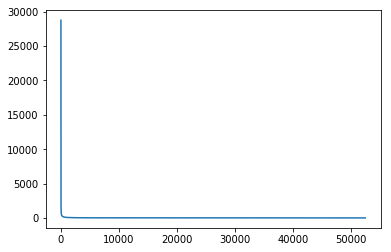

In [174]:
from collections import Counter

%matplotlib inline

words_count = Counter(TOKENS)

words_with_fre = [f for w, f in words_count.most_common()]

import matplotlib.pyplot as plt

plt.plot(words_with_fre)

In [175]:
words_with_fre[0:10]

[28764, 7563, 6529, 4883, 4245, 2531, 2433, 2374, 2114, 1960]

In [176]:
words_count.most_common(100)


[('的', 28764),
 ('在', 7563),
 ('了', 6529),
 ('是', 4883),
 ('和', 4245),
 ('也', 2531),
 ('月', 2433),
 ('有', 2374),
 ('将', 2114),
 ('他', 1960),
 ('年', 1959),
 ('对', 1795),
 ('都', 1720),
 ('中', 1699),
 ('为', 1686),
 ('日', 1674),
 ('等', 1655),
 ('与', 1601),
 ('中国', 1597),
 ('上', 1583),
 ('不', 1566),
 ('就', 1530),
 ('被', 1484),
 ('6', 1454),
 ('我', 1425),
 ('到', 1385),
 ('这', 1330),
 ('人', 1321),
 ('但', 1296),
 ('\n', 1196),
 ('后', 1186),
 ('一个', 1173),
 ('从', 1120),
 ('还', 1117),
 ('并', 1103),
 ('说', 1065),
 ('而', 1027),
 ('市场', 1018),
 ('会', 1001),
 ('我们', 981),
 ('没有', 981),
 ('表示', 934),
 ('让', 878),
 ('自己', 831),
 ('进行', 818),
 ('要', 817),
 ('已经', 808),
 ('记者', 794),
 ('时', 774),
 ('可以', 773),
 ('个', 761),
 ('他们', 759),
 ('以', 752),
 ('公司', 730),
 ('下', 723),
 ('更', 699),
 ('发展', 694),
 ('5', 670),
 ('她', 652),
 ('美国', 651),
 ('其', 649),
 ('可能', 648),
 ('多', 646),
 ('你', 640),
 ('这个', 636),
 ('着', 631),
 ('目前', 611),
 ('就是', 611),
 ('能', 594),
 ('通过', 591),
 ('企业', 572),
 ('给', 567),
 (

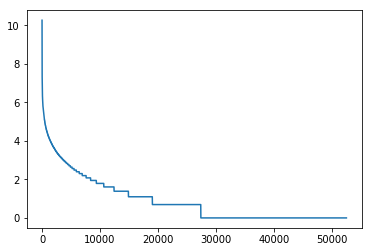

In [177]:
import numpy as np

plt.plot(np.log(words_with_fre))

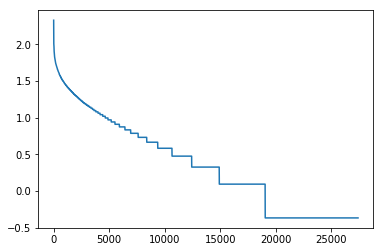

In [178]:
 plt.plot(np.log(np.log(words_with_fre)))

#在大量的文本中，出现次数第二多的单词，他出现的概率是出现频率最高的单词的1/2，
#出现评率第三稿的单词，频率是最高的单词的1/3  1000=>1/1000

In [179]:
#list(jieba.cut('一加手机5要做市面最轻薄'))

TOKENS[:1]

['此外']

In [180]:
_2_gram_words = [
    TOKENS[i] + TOKENS[i+1] for i in range(len(TOKENS)-1) 
]

#_2_gram_words[:10]

_2_gram_word_counts = Counter(_2_gram_words)

#_2_gram_word_counts

2-Gram:
$$ Pr(sentence) = Pr(w1_1 \cdot w2 \cdots w_n) = \prod \frac{count(w_i,w_{i+1})}{count(w_{i+1})}$$

In [181]:
def get_1_gram_count(word):
    if word in words_count: return words_count[word]
    else:
        return words_count.most_common()[-1][-1]
    
def get_2_gram_count(word):
    if word in _2_gram_word_counts: return _2_gram_word_counts[word]
    else:
        return _2_gram_word_counts.most_common()[-1][-1]
    

In [182]:
def two_gram_model(sentence):
    tokens = cut(sentence)
# two gram 模型
    probability = 1
    for i in range(len(tokens)-1):
        word = tokens[i]
        next_word = tokens[i+1]
        
        _two_gram_c = get_gram_count(word+next_word,_2_gram_word_counts)
        _one_gram_c = get_gram_count(next_word,words_count)
        
        pro = _two_gram_c /_one_gram_c
        
        probability *= pro
    
    return probability

In [183]:
def get_gram_count(word,wc):
    if word in wc: return wc[word]
    else:
        return wc.most_common()[-1][-1]
    

In [184]:
#get_gram_count('aaa',words_count)

get_gram_count('aaa',_2_gram_word_counts)


1

In [185]:
two_gram_model('前天早上吃晚饭的时候')

7.429922323539344e-07

In [186]:
two_gram_model('我请你吃火锅')

3.0458089668615984e-06

In [187]:
two_gram_model('我请你吃日料大餐')

5.710891812865497e-08

In [188]:
two_gram_model('这个人来自清华大学')

2.102784086130036e-06

In [189]:
two_gram_model('这个人来自秦华大学')

2.751306280917804e-07